In [57]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

# IMPORTING DATA



In [58]:
df = pd.read_csv('khachhang.csv')
#df.drop('Unnamed: 0', axis = 1, inplace = True)
# df.set_index('Customer Id', inplace = True)

#print(cl(df.head(), attrs = ['bold']))



In [59]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


C:\Users\Duy Long\AppData\Local\Temp\ipykernel_4980\897909796.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'], color = 'orange')


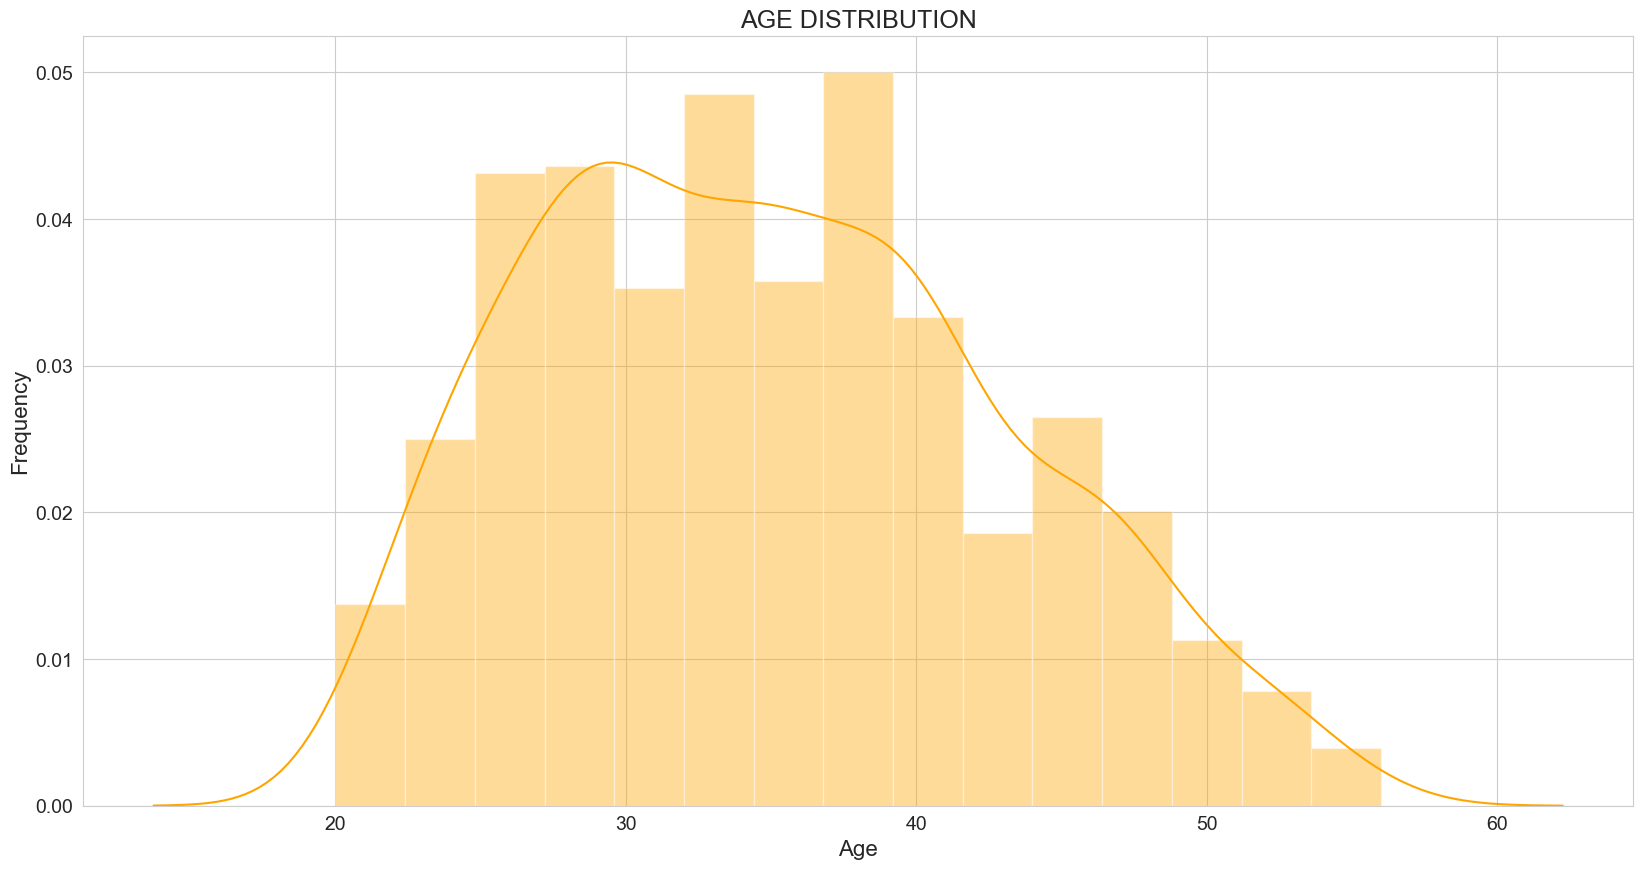

In [60]:
# Phân tích dữ liệu

# Xem sự phân bố của trường tuổi

print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], color = 'orange')
plt.title('AGE DISTRIBUTION', fontsize  = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()



In [61]:
df['Age'].isna().sum()

0

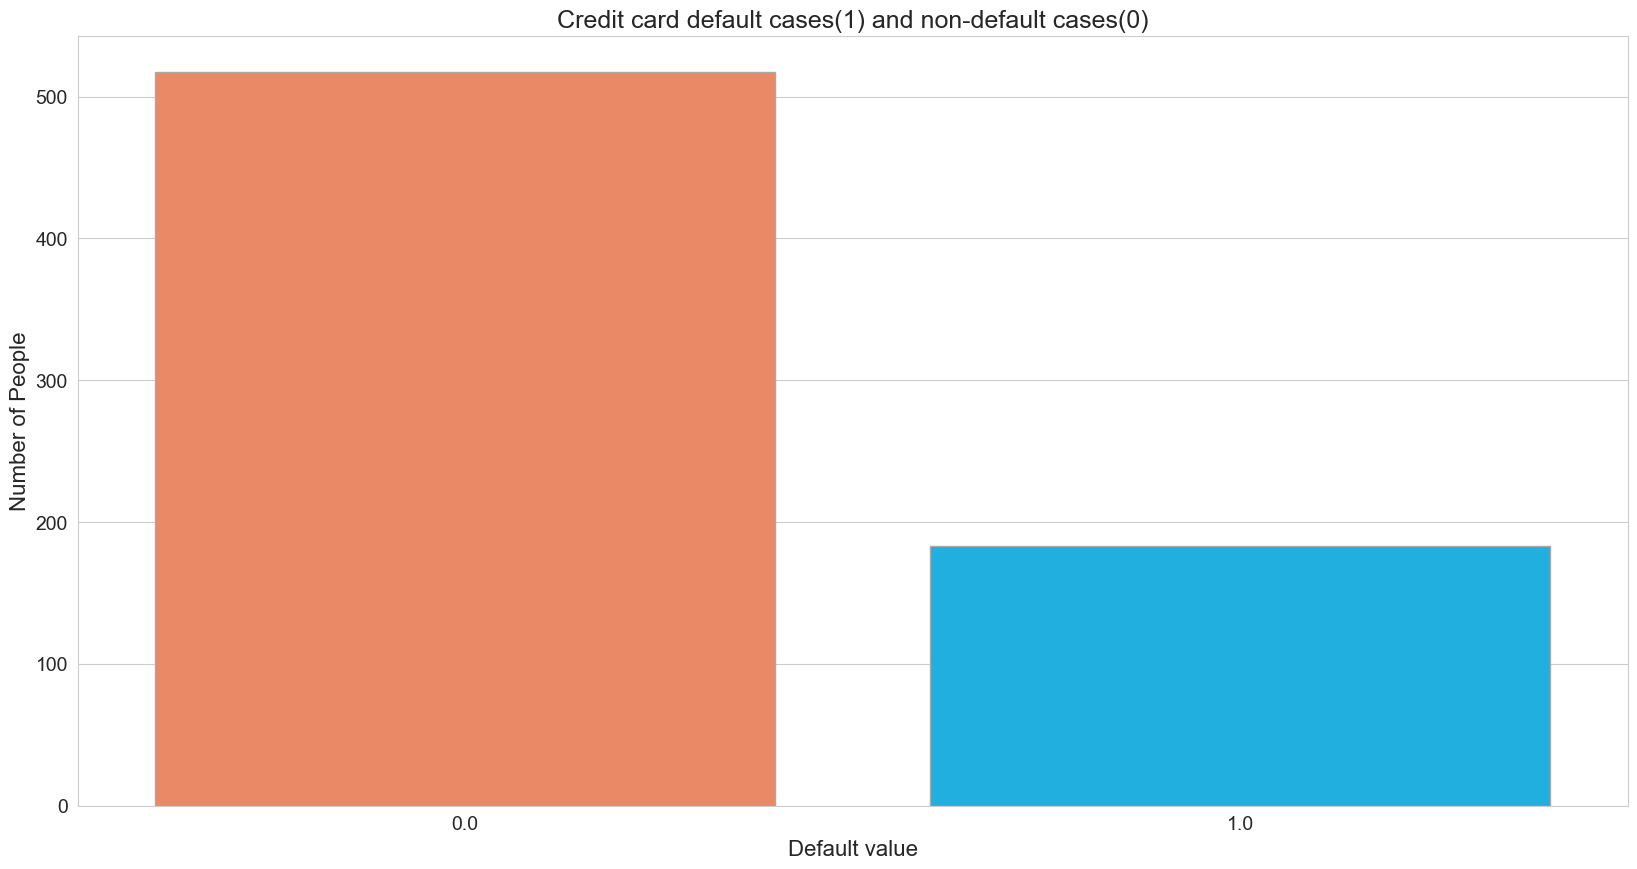

In [62]:
# Credit card default cases
#chúng ta có thể xem có bao nhiêu khách hàng là mặc định (1) và bao nhiêu trong số họ không phải là (0) cũng là tỷ lệ phần trăm trường hợp mặc định.

sb.countplot(x='Defaulted',data=df,  palette = ['coral', 'deepskyblue'],  edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)',  fontsize = 18)
plt.xlabel('Default value',  fontsize = 16)
plt.ylabel('Number of People',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()



In [63]:
# Age vs Income
#phân tích sự tương quan giữa thu nhập và độ tuổi

sb.scatterplot('Age', 'Income',  data = df,  color = 'deepskyblue', s = 150, alpha = 0.6,  edgecolor = 'b')
plt.title('AGE / INCOME', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Income',  fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()


TypeError: scatterplot() got multiple values for argument 'data'

In [64]:

# Years Employed vs Income
#phân tích sự tương quan giữa thu nhập và năm làm việc

area = df.DebtIncomeRatio **2

sb.scatterplot('Years Employed', 'Income', data = df, s = area, alpha = 0.6, edgecolor = 'white', hue = 'Defaulted', palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', fontsize = 18)
plt.xlabel('Years Employed', fontsize = 16)
plt.ylabel('Income', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('y_income.png')
plt.show()



TypeError: scatterplot() got multiple values for argument 'data'

In [ ]:
# DATA PROCESSING
#xử lý dữ liệu
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
df


Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
6,40,1,23,81,0.998,7.831,NaN,10.9
7,38,2,4,56,0.442,0.454,0.0,1.6
8,42,3,0,64,0.279,3.945,0.0,6.6
9,26,1,5,18,0.575,2.215,NaN,15.5


In [ ]:

# MODELING
#Phân cụm dữ liệu (xây dựng mô hình) với số cụm là 3 lặp tối đa 12 lần
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))



[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [ ]:
#thêm trường nhãn phân cụm cho dữ liệu
df['cluster_num'] = labels
df
print(cl(df.head(), attrs = ['bold']))

#print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))

             Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  cluster_num  
Customer Id                                           
1                  0.0              6.3            1  
2                  0.0             12.8            2  
3                  1.0             20.9            1  
4                  0.0              6.3            1  
5                  0.0              7.2            0  


In [ ]:
# MODEL INSIGHTS
# sử dụng phương thức 'groupby' để nhóm giá trị cụm và xem giá trị trung bình của từng thuộc tính 
#trong tập dữ liệu bằng phương pháp 'mean'.
#df['cluster_num'] = labels
#print(cl(df.head(), attrs = ['bold']))

print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))





                   Age       Edu  Years Employed      Income  Card Debt  \
cluster_num                                                               
0            45.388889  2.666667       19.555556  227.166667   5.678444   
1            32.967692  1.613846        6.389231   31.204615   1.032711   
2            41.368132  1.961538       15.252747   84.076923   3.114412   

             Other Debt  Defaulted  DebtIncomeRatio  
cluster_num                                          
0             10.907167   0.285714         7.322222  
1              2.108345   0.284658        10.095385  
2              5.770352   0.172414        10.725824  


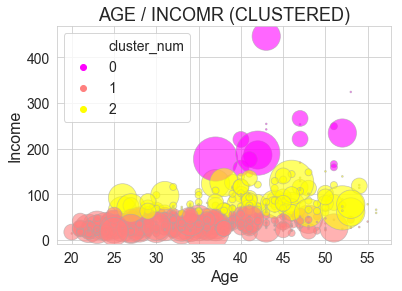

<Figure size 432x288 with 0 Axes>

In [ ]:
#vẽ biểu đồ các cụm trong không gian 2 chiều theo trường tuổi và thu nhập
area = np.pi * (df.Edu) ** 4

sb.scatterplot('Age', 'Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOMR (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()


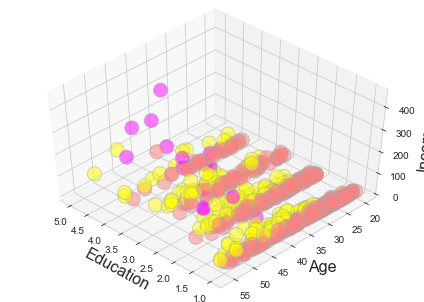

In [ ]:
#vẽ biểu đồ theo không gian 3 chiều 
fig = plt.figure(1)
plt.clf()

ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()